## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Understanding

## Problem Statement
CineNova Studios is exploring an expansion into the film industry and aims to produce high-grossing movies similar to those created by major film studios. However, the company currently lacks experience in this domain and needs strategic direction. To inform its entry, CineNova is seeking insights into current market trends—specifically, which types of movies are generating the highest revenue.

## Objectives
i) Identify the most profitable movie genres currently dominating the box office.

ii) Evaluate key factors (e.g. genre, budget, release date) that contribute to a film’s financial success.

iii) Analyze audience reception and critical ratings to understand their influence on box office performance.

iv) Quantify the relationship between production budgets and revenue to determine optimal investment levels.

v) Assess market trends over recent years to identify emerging opportunities for new film content.

## Data Understanding
A total of 5 datasets and a database were used in the project.
bom.movie_gross.csv which has 3387 rows and 5 columns 
tmd.movies.csv which has 26,517 rows and 10 columns.
tn.movie_budgets.csv which has 5782 rows and 6 columns.
rt.movie_info.tsv which has 156o rows and 12 columns.
rt.reviews.tsv which has 54432 rows and 8 columns
im.db where genres, averagerating, numvotes were extracted from the database and converted to a dataframe with 73,856 rows and 3 columns

## Data Cleaning

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
data1 = pd.read_csv('bom.movie_gross.csv')
data1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
data1.shape

(3387, 5)

In [4]:
data1.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The data types are accurate for each of the variables except for foreign_gross

In [6]:
# Create a dataframe copy to be used in data cleaning for the first data set
dataf1=data1.copy(deep=True)

In [7]:
# change data type
dataf1['foreign_gross'] = dataf1['foreign_gross'].str.replace(',', '', regex=False).astype(float)

In [8]:
dataf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [9]:
# Checking for unique values
for column in dataf1:
    unique_values = dataf1[column].unique()
    print(f"unique values in column'{column}', '\n':{unique_values}",'\n')

unique values in column'title', '
':['Toy Story 3' 'Alice in Wonderland (2010)'
 'Harry Potter and the Deathly Hallows Part 1' ... 'El Pacto' 'The Swan'
 'An Actor Prepares'] 

unique values in column'studio', '
':['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' nan 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE' 'Scre.' 'Kino'
 'Abr.' 'CZ' 'ATO' 'First' 'GK' 'FInd.' 'NFC' 'TFC' 'Pala.' 'Imag.' 'NAV'
 'Arth.' 'CLS' 'Mont.' 'Olive' 'CGld' 'FOAK' 'IVP' 'Yash' 'ICir' 'FM'
 'Vita.' 'WOW' 'Truly' 'Indic.' 'FD' 'Vari.' 'TriS' 'ORF' 'IM' 'Elev.'
 'Cohen' 'NeoC' 'Jan.' 'MNE' 'Trib.' 'Rocket' 'OMNI/FSR' 'KKM' 'Argo.'
 'SMod' 'Libre' 'FRun' 'WHE' 'P4' 'KC' 'SD' 'AM' 'MPFT' 'Icar.' 'AGF'
 'A23' 'Da.' 'NYer' 'Rialto' 'DF' 'KL' 'ALP' 'LG/S' 'WGUSA' 'MPI

In [10]:
# Drop Duplicates
dataf1=dataf1.drop_duplicates()
dataf1.shape

(3387, 5)

The dataset's shape remains the same hence no duplicates were found.

In [11]:
# Check column names
dataf1.columns


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [12]:
# Drop unneccessary columns
del dataf1["studio"]
dataf1.columns

Index(['title', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [13]:
# Check missing values
dataf1.isna().sum()

title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

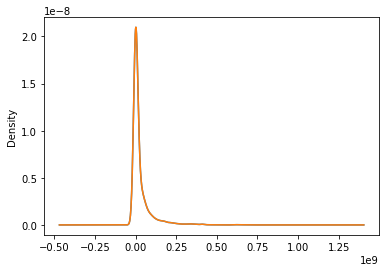

In [34]:
# Fill missing values with mean or median
dataf1['domestic_gross'].plot.kde()
plt.show()

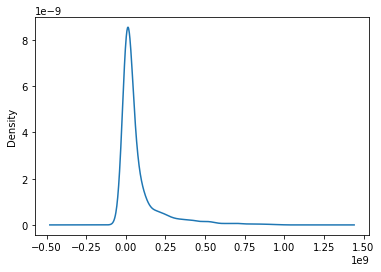

In [35]:
dataf1['foreign_gross'].plot.kde()
plt.show()

Distriution is skewed for both column, so replace the null values with the median. 

In [36]:
dataf1[['domestic_gross', 'foreign_gross']] = dataf1[['domestic_gross', 'foreign_gross']].fillna(dataf1[['domestic_gross', 'foreign_gross']].median())


In [37]:
dataf1.isna().sum()

title             0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [15]:
data2 = pd.read_csv('tmdb.movies.csv')
data2.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
data2.shape

(26517, 10)

In [17]:
data2.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [18]:
data3 = pd.read_csv('tn.movie_budgets.csv')
data3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [19]:
data3.shape

(5782, 6)

In [20]:
data3.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [21]:
data4 = pd.read_csv('rt.movie_info.tsv', sep = '\t')
data4.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [22]:
data4.shape

(1560, 12)

In [23]:
data4.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [24]:
data5 = pd.read_csv('rt.reviews.tsv', sep = '\t', encoding = 'latin -1' )
data5.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [25]:
data5.shape

(54432, 8)

In [26]:
data5.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [27]:
import sqlite3

conn = sqlite3.connect('im.db')
cur = conn.cursor()

datadata = """SELECT genres, averagerating, numvotes
                FROM movie_basics
                JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id ;
          
          """

pd.read_sql(datadata, conn)

,genres,averagerating,numvotes
0,"Action,Crime,Drama",7.0,77
1,"Biography,Drama",7.2,43
2,Drama,6.9,4517
3,"Comedy,Drama",6.1,13
4,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...
73851,Documentary,6.2,6
73852,"Drama,Family",8.7,136
73853,Documentary,8.5,8
73854,None,6.6,5


In [28]:
type(datadata)

str

In [29]:
data6 = pd.read_sql(datadata, conn)
data6

,genres,averagerating,numvotes
0,"Action,Crime,Drama",7.0,77
1,"Biography,Drama",7.2,43
2,Drama,6.9,4517
3,"Comedy,Drama",6.1,13
4,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...
73851,Documentary,6.2,6
73852,"Drama,Family",8.7,136
73853,Documentary,8.5,8
73854,None,6.6,5


In [30]:
type(data6)

pandas.core.frame.DataFrame

In [31]:
data6.shape

(73856, 3)

In [32]:
data6.isna().sum()

genres           804
averagerating      0
numvotes           0
dtype: int64